# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# Import the datasets

In [2]:
numerical = pd.read_csv('numerical.csv')
numerical.shape

(95412, 315)

In [3]:
#numerical.dtypes

In [4]:
categorical = pd.read_csv('categorical.csv')
categorical.shape

(95412, 22)

In [5]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [6]:
categorical=categorical.astype(object)

In [7]:
categorical.dtypes

STATE           object
CLUSTER         object
HOMEOWNR        object
GENDER          object
DATASRCE        object
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B        object
ODATEW_YR       object
ODATEW_MM       object
DOB_YR          object
DOB_MM          object
MINRDATE_YR     object
MINRDATE_MM     object
MAXRDATE_YR     object
MAXRDATE_MM     object
LASTDATE_YR     object
LASTDATE_MM     object
FIRSTDATE_YR    object
FIRSTDATE_MM    object
dtype: object

In [8]:
categorical.columns # I will drop some of these columns. The ones with years and months...

Index(['STATE', 'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'RFA_2R',
       'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B', 'ODATEW_YR', 'ODATEW_MM',
       'DOB_YR', 'DOB_MM', 'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR',
       'MAXRDATE_MM', 'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR',
       'FIRSTDATE_MM'],
      dtype='object')

In [9]:
targets = pd.read_csv('target.csv')
targets.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [10]:
targets.dtypes

TARGET_B      int64
TARGET_D    float64
dtype: object

In [13]:
data = pd.concat([numerical, categorical, targets], axis = 1)
data.shape

(95412, 339)

In [14]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [15]:
data.isna().sum().sum() # check for NaNs

0

# X-y Split

In [16]:
y = data['TARGET_B']
X = data.drop(['TARGET_B','TARGET_D','ODATEW_YR', 'ODATEW_MM',
       'DOB_YR', 'DOB_MM', 'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR',
       'MAXRDATE_MM', 'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR',
       'FIRSTDATE_MM'], axis = 1)


# Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((76329, 325), (76329,), (19083, 325), (19083,))

# Num - Cat Split

In [19]:
numerical_X_train = X_train.select_dtypes(np.number)
categorical_X_train = X_train.select_dtypes(object)

In [20]:
categorical_X_train.shape, numerical_X_train.shape

((76329, 10), (76329, 315))

In [21]:
numerical_X_test = X_test.select_dtypes(np.number)
categorical_X_test = X_test.select_dtypes(object)

In [22]:
categorical_X_test.shape, numerical_X_test.shape

((19083, 10), (19083, 315))

# MinMax Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
def MinMax(data, MinMaxtransformer):
    X_normalized = MinMaxtransformer.transform(data)
    print(X_normalized.shape)
    X_normalized = pd.DataFrame(X_normalized,columns=data.columns)
    return X_normalized

In [24]:
MinMaxtransformer = MinMaxScaler().fit(numerical_X_train)

In [25]:
X_train_num_scaled = MinMax(numerical_X_train, MinMaxtransformer)
X_test_num_scaled = MinMax(numerical_X_test, MinMaxtransformer)

(76329, 315)
(19083, 315)


# PCA (numerical columns only)

In [ ]:
## I APLLY PCA ONLY TO THE NUMERICALS (TRAIN & TEST)

## QUESTION: 
## DO WE APPLY PCA ON ONE-HOT ENCODED COLUMNS, TOO? 
## SO, SHOULD I HAVE CONCATANETED X_NUM_SCALLED & X_CAT_ENCO (FOR TRAIN AND TEST SEPARATELY), AND 
## HAVE APPLIED PCA TO THOSE CONCATTED DATAFRAMES?



In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA()
pca.fit(X_train_num_scaled)

PCA()

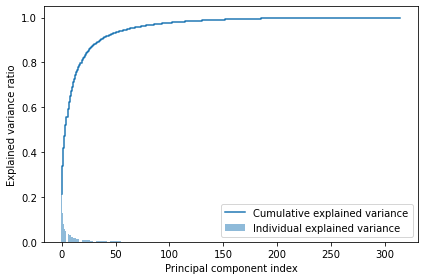

In [28]:
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [29]:
pca.explained_variance_ratio_[:43].sum()

0.9164526479671193

In [30]:
pca = PCA(43)
pca.fit(X_train_num_scaled)

PCA(n_components=43)

In [31]:
X_train_pca = pca.transform(X_train_num_scaled)
X_test_pca = pca.transform(X_test_num_scaled)

In [32]:
X_train_pca=pd.DataFrame(X_train_pca)

X_test_pca=pd.DataFrame(X_test_pca)

In [33]:
X_test_pca # columns are the PCs. Column '0' is the PC-1. And so on..

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.710326,-0.164025,0.295361,0.098650,0.324404,-0.258915,0.196918,0.246786,0.284193,0.290217,-0.209869,0.079077,0.383362,0.227601,0.013528,-0.404154,-0.265932,0.091493,0.170410,0.120061,0.198195,-0.116426,-0.072877,-0.069869,-0.180440,0.194694,-0.001833,0.005305,-0.028329,0.266436,0.281481,-0.013554,-0.130669,0.202906,0.040403,0.032433,-0.081368,-0.160378,0.005357,-0.040031,0.033186,0.151270,0.104613
1,-0.698464,0.978356,-1.409347,0.024058,-0.709765,0.972812,0.103427,-0.360622,0.188232,-0.389492,-0.649117,0.774774,0.120863,-0.468853,-0.420438,-0.052470,-0.310306,-0.581290,0.366022,0.018672,0.264652,0.032071,-0.187523,-0.261567,-0.145426,-0.279364,-0.081723,-0.127551,-0.060066,0.021111,-0.109524,0.089399,-0.129066,0.063488,0.261560,0.035906,0.251950,-0.056065,-0.067646,0.195844,0.069440,0.072927,-0.002203
2,2.115148,-0.871863,-0.789510,0.141967,-0.037700,0.017207,0.813187,0.201160,-0.085582,-0.342163,-0.265490,-0.114329,0.057263,0.067131,0.223418,-0.119874,-0.299089,-0.145353,-0.239393,0.389000,0.530072,-0.216722,0.023242,0.157476,0.148673,0.225323,0.131893,0.281648,0.212460,-0.099427,-0.087126,-0.001654,0.322206,0.041873,0.055991,-0.057419,0.150454,-0.138632,-0.098241,0.192367,0.182991,-0.041977,0.008767
3,0.903435,-0.820479,-0.520599,-0.552015,-0.262987,0.372393,-0.571368,-0.147326,0.127082,0.030767,0.188172,-0.030414,0.610866,-0.565072,0.102346,0.042231,-0.174926,-0.089867,-0.184369,0.381013,-0.221220,-0.109163,0.197403,-0.027777,0.053219,-0.208041,-0.033698,0.151159,0.160257,-0.065989,-0.025211,-0.002833,0.160838,-0.166550,0.008770,-0.079926,0.153955,0.018691,-0.001101,0.042896,-0.020422,-0.007885,0.081204
4,-0.253114,0.101719,-0.050225,-1.455880,-0.356766,0.158821,0.691027,0.498708,0.467432,0.067858,-0.275533,-0.214377,-0.119375,0.423234,0.936429,-0.377791,0.266621,-0.005358,0.283813,-0.210226,-0.203125,0.318278,-0.031592,-0.014332,0.584244,-0.039758,-0.117451,0.160810,0.284356,0.524287,-0.082081,0.281433,0.983611,-0.256715,0.017051,0.467019,0.257185,0.088466,0.027611,-0.406493,0.032446,0.502385,0.386143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,-1.312036,-0.229959,-0.205189,-0.410467,0.303576,-0.751994,0.098050,0.100790,-0.142043,0.135703,0.333840,0.223896,0.078858,0.323103,0.076132,-0.407577,0.449289,0.164034,-0.103308,-0.266186,-0.003883,-0.155147,0.451482,0.237690,0.278646,-0.131064,-0.204565,0.155003,-0.084517,0.303084,0.171263,-0.064547,0.096032,-0.052324,0.140251,0.021383,0.019318,0.142615,-0.135838,-0.142541,0.036101,-0.228392,-0.091313
19079,-0.282990,-0.248439,-0.960379,0.192684,0.008366,0.635742,0.013229,-0.512928,-0.398670,-0.264337,0.060250,-0.100244,0.395818,0.296193,0.081207,0.537377,0.343285,-0.178751,-0.341333,0.286637,-0.017584,0.708054,0.337544,0.214016,0.110394,0.191686,-0.545760,0.228279,-0.003039,0.089866,-0.120725,-0.015374,-0.049557,0.148285,0.200914,0.056821,0.071838,-0.160858,0.095355,0.135172,-0.025017,-0.120338,0.076563
19080,-1.868053,-0.923979,0.341786,0.474461,-0.626235,-0.098750,-0.218500,-0.463379,-0.143429,0.395942,-0.379775,0.265585,-0.024095,0.250715,-0.099585,-0.155895,0.060990,0.263566,0.013797,0.069768,0.087224,0.087133,0.028778,-0.082894,0.020800,0.379047,-0.140223,-0.242710,0.159500,0.196325,0.079961,-0.158416,-0.042774,-0.115157,-0.054144,0.293600,-0.032735,-0.085764,-0.042160,-0.249442,0.109361,-0.092143,0.090788
19081,-1.355119,0.590910,-0.398039,-0.126045,0.688446,-0.468919,-0.253529,0.936247,0.191434,0.282956,-0.252700,0.037238,-0.116140,-0.452304,0.040502,-0.003926,0.296561,0.042390,-0.259955,0.092540,-0.158813,0.003489,0.253559,-0.107610,-0.010800,0.252685,0.133139,0.052123,0.014236,0.109537,0.081322,0.133607,-0.018771,0.190123,0.043112,-0.078910,0.005284,-0.098881,0.072031,-0.134785,0.203944,0.008455,-0.032122


In [34]:
X_test_pca.shape

(19083, 43)

# One-Hot Encoding

## X_train

In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(categorical_X_train) # keep the encoder
cols=encoder.get_feature_names_out(input_features=categorical_X_train.columns)
encoded = encoder.transform(categorical_X_train).toarray()
X_train_encoded = pd.DataFrame(encoded,columns=cols)

In [36]:
X_train_encoded.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
X_train_encoded.shape

(76329, 81)

## X_test

In [38]:
cols=encoder.get_feature_names_out(input_features=categorical_X_test.columns)
encoded = encoder.transform(categorical_X_test).toarray()
X_test_encoded = pd.DataFrame(encoded,columns=cols)


In [39]:
X_test_encoded.head()


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [40]:
X_test_encoded.shape

(19083, 81)

# Reset Index

In [41]:
y_train.shape, y_test.shape

((76329,), (19083,))

In [42]:
y_train=pd.DataFrame(y_train)

y_test=pd.DataFrame(y_test)

In [43]:
y_train.shape, y_test.shape

((76329, 1), (19083, 1))

In [44]:
X_train_encoded=X_train_encoded.reset_index(drop=True)
X_test_encoded=X_test_encoded.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
X_train_pca=X_train_pca.reset_index(drop=True)
X_test_pca=X_test_pca.reset_index(drop=True)

In [45]:
display(X_train_encoded.isna().sum().sum())
display(X_train_pca.isna().sum().sum())

display(X_test_encoded.isna().sum().sum())
display(X_train_pca.isna().sum().sum())

0

0

0

0

# Concatenating

## Train

In [46]:
X_train_processed = pd.concat([X_train_pca, X_train_encoded], axis = 1)

In [47]:
X_train_processed.isna().sum().sum()

0

In [48]:
X_train_processed.shape

(76329, 124)

## Test

In [49]:
X_test_processed = pd.concat([X_test_pca, X_test_encoded], axis = 1)

In [50]:
X_test_processed.isna().sum().sum()

0

In [51]:
X_test_processed.shape

(19083, 124)

# Oversampling the training set

In [52]:
from sklearn.utils import resample

In [53]:
train = pd.concat([X_train_processed, y_train],axis=1)

In [54]:
not_donate = train[train['TARGET_B']==0]
donate = train[train['TARGET_B']==1]

In [55]:
display(not_donate.shape)
display(donate.shape)

(72486, 125)

(3843, 125)

In [56]:
# oversample minority
donate_oversampled = resample(donate, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = len(not_donate))#<- make both sets the same size


In [57]:
display(not_donate.shape)
display(donate_oversampled.shape)
donate_oversampled.head()

(72486, 125)

(72486, 125)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,TARGET_B
6040,-1.951056,-1.034380,0.143132,0.275281,-0.026950,-0.706608,0.268505,-0.534550,-0.172622,0.479128,-0.263498,-0.107124,-0.034705,0.368936,-0.029260,-0.380949,-0.069861,0.150169,-0.130728,-0.157881,0.111504,0.291616,-0.491186,-0.211901,0.006279,0.161183,-0.093385,0.556005,0.172028,0.071347,0.032976,-0.048334,0.033637,-0.138552,-0.115351,0.114721,0.053671,0.165554,0.119213,0.054389,0.119509,0.153685,-0.055332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8124,-0.208663,-1.094797,0.238161,-0.623814,0.150343,-0.090813,0.519659,0.849652,0.385285,-0.615767,0.109440,-0.777793,-0.350341,-0.456341,-0.469647,-0.128984,-0.193163,-0.119745,-0.254341,0.046899,0.254734,0.228046,0.037806,-0.267062,-0.059881,0.110344,-0.112007,-0.276263,-0.076338,-0.129238,-0.155760,0.322377,-0.195570,0.127538,-0.464079,0.070072,-0.054749,0.143673,0.136721,-0.064524,0.118868,0.372820,0.060979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
21597,1.800071,1.298913,0.075424,1.100050,-0.465228,-0.776082,-0.387197,-0.205464,-0.109763,0.208635,0.019819,0.474757,-0.025287,-0.397765,-0.206613,-0.103317,0.224726,0.265452,0.021514,0.221098,0.021987,0.094917,-0.177240,0.201238,0.016339,-0.211127,-0.165710,-0.384158,0.087110,0.053114,0.042579,-0.137307,0.092593,-0.022548,-0.318631,-0.129663,0.139562,0.113883,0.136772,-0.082768,0.056622,-0.044350,0.175452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
69733,-0.713564,-0.587476,0.914273,1.063759,-0.457393,-0.254751,0.023388,-0.152551,-0.418116,-0.129226,-0.285698,-0.423596,-0.128261,0.416445,-0.017014,-0.005887,-0.127240,-0.201466,0.380677,-0.472387,-0.084086,0.328035,-0.223429,0.495000,-0.196371,0.076611,0.340561,0.137487,0.170234,-0.131274,-0.080979,0.123475,-0.215091,0.133637,-0.042375,-0.133507,-0.025249,0.135700,0.141227,0.093438,0.132394,-0.009097,0.038734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
31668,-0.624372,-1.293844,0.571342,-0.161453,-0.33

In [58]:
train_oversampled = pd.concat([not_donate,donate_oversampled],axis=0)
train_oversampled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,TARGET_B
0,-0.248832,0.392979,-0.612404,-0.513127,0.581158,-0.055988,-0.204329,-0.472005,0.172612,0.524718,0.332771,0.267082,-0.389355,-0.197473,-0.113035,-0.174829,-0.084433,-0.052135,-0.088652,-0.072664,-0.207350,0.134055,0.015246,0.266972,-0.055124,-0.106348,-0.367329,-0.152619,0.270751,0.023429,-0.041453,0.089460,0.157101,0.179319,-0.150844,-0.180073,0.129982,0.222614,-0.005107,0.083219,-0.114761,0.085013,-0.050507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-1.594997,-0.248119,-0.162960,0.317509,-0.577234,0.187068,-0.414772,0.195288,0.128224,0.246097,-0.483030,0.455991,0.129222,0.593994,0.069998,-0.113996,-0.133379,0.108593,0.138525,-0.184436,0.294842,-0.465963,0.219461,-0.003600,0.046379,-0.072891,0.106226,-0.082218,0.018489,-0.038566,-0.057391,-0.006818,0.100320,-0.007957,0.006789,-0.026265,-0.047138,-0.044423,-0.081418,0.025724,0.019592,-0.028310,-0.034403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1.487341,-0.087474,-1.251334,0.561906,0.060807,-0.599999,0.182712,-0.095629,0.702433,0.238407,-0.119498,-0.436978,-0.091477,-0.200778,-0.103364,-0.120561,-0.269263,-0.055682,0.101668,0.025602,0.202334,-0.179434,0.156551,0.132297,-0.025462,0.346554,-0.023211,-0.025755,0.036669,0.162004,-0.163317,-0.217781,0.040757,0.192981,0.086120,0.065917,-0.048963,-0.019228,-0.090532,0.197053,-0.077402,0.027814,0.112230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
4,0.014179,0.411805,0.461262,-1.414680,0.118585,-0.103375,0.294026,0.129247,0.084531,0.165355,-0.230264,-0.225160,0.364050,0.521572,0.471215,-0.311851,0.143062,0.057897,0.254853,0.283216,0.195320,0.404986,0.035837,0.537852,0.009637,-0.254153,-0.102044,-0.146167,-0.029939,-0.034442,-0.064235,-0.062346,0.348058,0.022670,0.190912,0.293968,0.101010,0.469627,0.021453,0.085639,-0.181938,0.062841,-0.196882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,-0.892361,0.364276,-1.265602,0.134504,0.558180,-0.363320,-0.526910,

In [59]:
y_train_over = train_oversampled['TARGET_B']
X_train_over = train_oversampled.drop('TARGET_B',axis = 1)

In [60]:
X_train_over

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,-0.248832,0.392979,-0.612404,-0.513127,0.581158,-0.055988,-0.204329,-0.472005,0.172612,0.524718,0.332771,0.267082,-0.389355,-0.197473,-0.113035,-0.174829,-0.084433,-0.052135,-0.088652,-0.072664,-0.207350,0.134055,0.015246,0.266972,-0.055124,-0.106348,-0.367329,-0.152619,0.270751,0.023429,-0.041453,0.089460,0.157101,0.179319,-0.150844,-0.180073,0.129982,0.222614,-0.005107,0.083219,-0.114761,0.085013,-0.050507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.594997,-0.248119,-0.162960,0.317509,-0.577234,0.187068,-0.414772,0.195288,0.128224,0.246097,-0.483030,0.455991,0.129222,0.593994,0.069998,-0.113996,-0.133379,0.108593,0.138525,-0.184436,0.294842,-0.465963,0.219461,-0.003600,0.046379,-0.072891,0.106226,-0.082218,0.018489,-0.038566,-0.057391,-0.006818,0.100320,-0.007957,0.006789,-0.026265,-0.047138,-0.044423,-0.081418,0.025724,0.019592,-0.028310,-0.034403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.487341,-0.087474,-1.251334,0.561906,0.060807,-0.599999,0.182712,-0.095629,0.702433,0.238407,-0.119498,-0.436978,-0.091477,-0.200778,-0.103364,-0.120561,-0.269263,-0.055682,0.101668,0.025602,0.202334,-0.179434,0.156551,0.132297,-0.025462,0.346554,-0.023211,-0.025755,0.036669,0.162004,-0.163317,-0.217781,0.040757,0.192981,0.086120,0.065917,-0.048963,-0.019228,-0.090532,0.197053,-0.077402,0.027814,0.112230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.014179,0.411805,0.461262,-1.414680,0.118585,-0.103375,0.294026,0.129247,0.084531,0.165355,-0.230264,-0.225160,0.364050,0.521572,0.471215,-0.311851,0.143062,0.057897,0.254853,0.283216,0.195320,0.404986,0.035837,0.537852,0.009637,-0.254153,-0.102044,-0.146167,-0.029939,-0.034442,-0.064235,-0.062346,0.348058,0.022670,0.190912,0.293968,0.101010,0.469627,0.021453,0.085639,-0.181938,0.062841,-0.196882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-0.892361,0.364276,-1.265602,0.134504,0.558180,-0.363320,-0.526910,0.598436,0.162502

#  Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_over, y_train_over)
print(clf.score(X_train_over, y_train_over))
print(clf.score(X_test_processed, y_test))

y_pred = clf.predict(X_test_processed)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
